<p style="background:black">
<code style="background:black;color:white">Data Set Used - Mall Customer Segmentation Data</code></p>

In [40]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [41]:
# Suppress Warning

import warnings
warnings.filterwarnings("ignore")

<p style="background:black">
<code style="background:black;color:white">1. Import Data Set</code></p>

In [42]:
df = pd.read_csv("../input/mall-customers/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
# Shape

df.shape

(200, 5)

In [44]:
df.rename(columns={"Genre":"Gender"}, inplace=True)

In [45]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [47]:
# Checking the null values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<p style="background:black">
<code style="background:black;color:white">2. Checking Outliers</code></p>

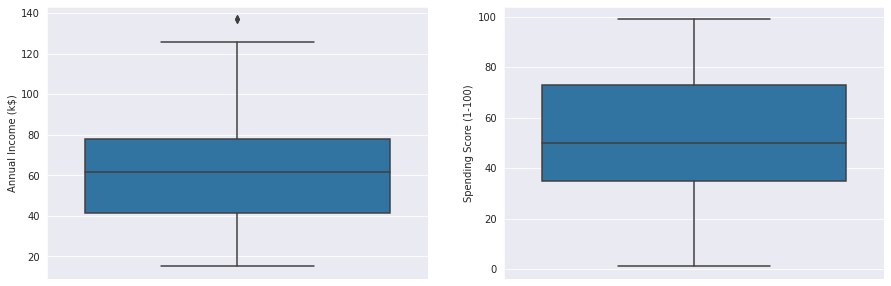

In [48]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")

plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - Data doesn't contain any outliers</code>

<p style="background:black">
    <code style="background:black;color:white">3. EDA : Exploratory Data Analysis</code></p>

<code style="background:skyblue;color:black">3.1 Univariate Analysis - Numerical Data Type</code>

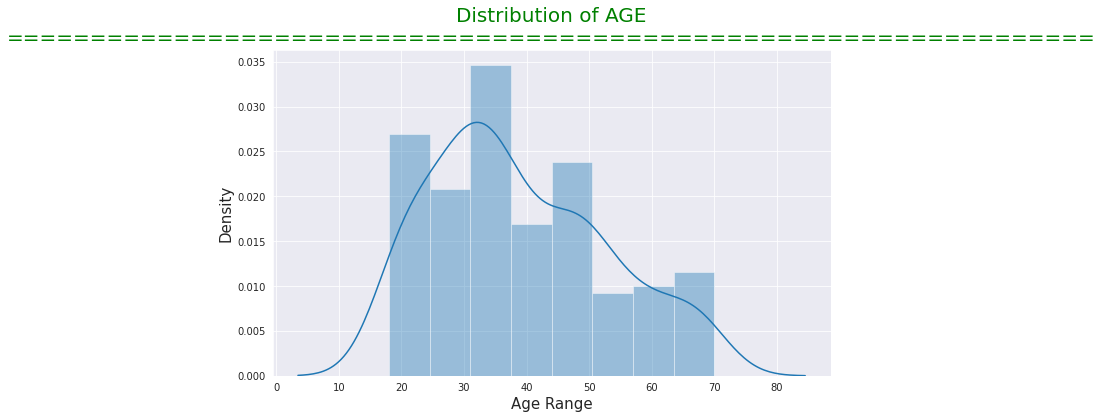

In [49]:
# Checking Age Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df.Age)
plt.title("Distribution of AGE\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()


<code style="background:yellow;color:black"><b>Conclusion</b> - There are customers of wide variety of ages</code>

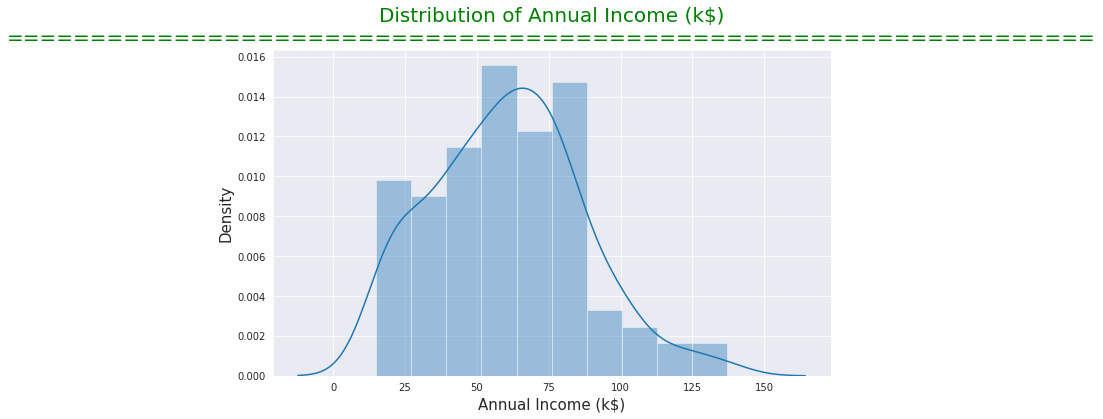

In [50]:
# Annual Income (k$) Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["Annual Income (k$)"])
plt.title("Distribution of Annual Income (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Annual Income (k$)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - Most of the annual income falls between 50K to 85K.</code>

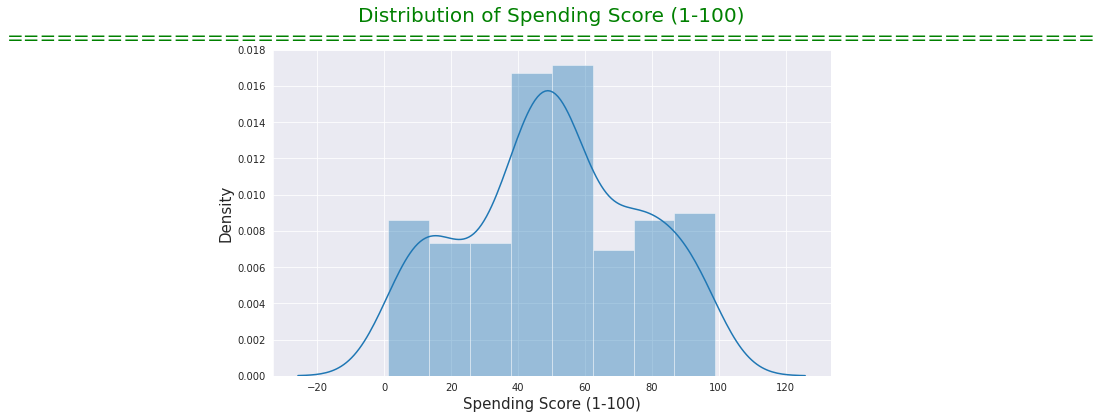

In [51]:
# Spending Score (1-100) Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - Most of the customers got the score ranging between 40 to 60</code>

<code style="background:skyblue;color:black">3.2 Univariate Analysis - Categorical Data Type</code>

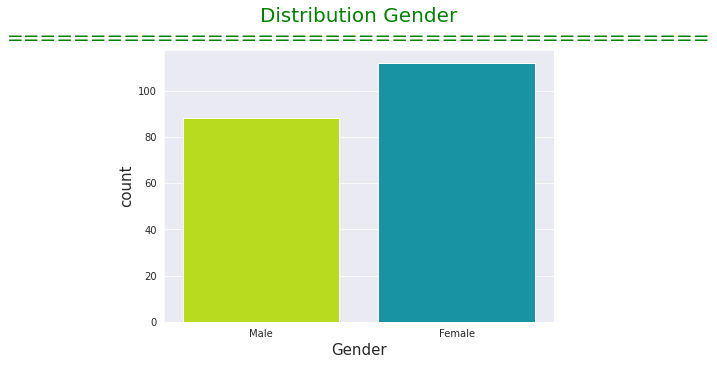

In [52]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')

plt.title("Distribution Gender\n==========================================", fontsize=20, color="green")
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count", fontsize=15)
sns.countplot(df.Gender, palette="nipy_spectral_r")
plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - Female customers are more as compared to the male customers</code>

<code style="background:skyblue;color:black">3.3 Bivariate Analysis - Numerical-Numerical Data Type</code>

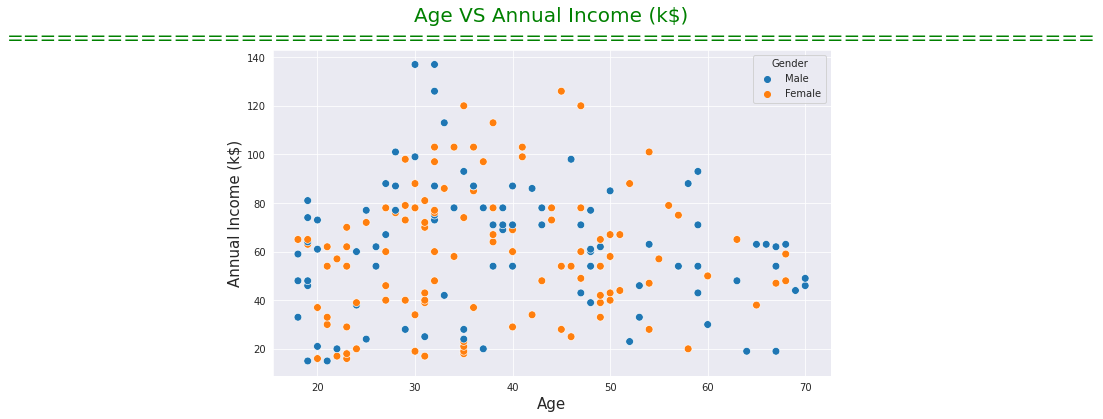

In [53]:
# Age VS Anual Income

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Age", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Age VS Annual Income (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

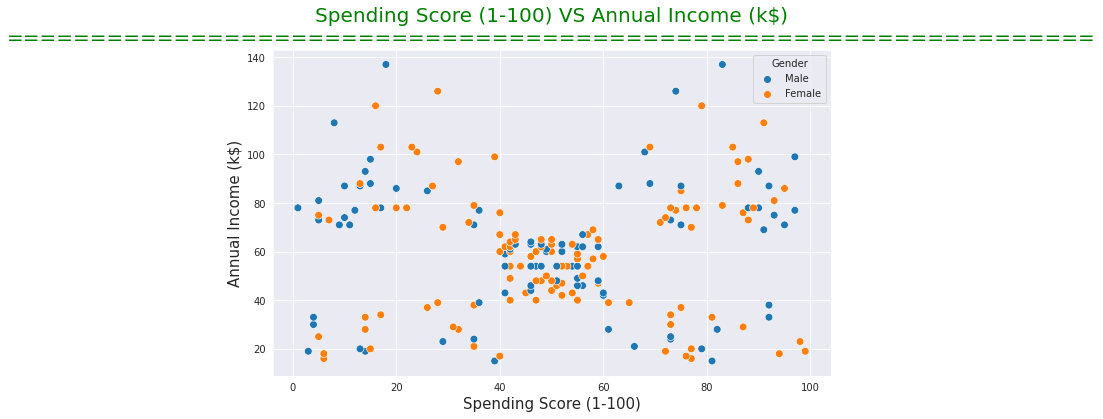

In [54]:
# Age VS Anual Income

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Spending Score (1-100) VS Annual Income (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

<code style="background:skyblue;color:black">3.4 Binning - Age, Income and Spending Score</code>

### Age

In [55]:
# Age - 

Age_18_28 = df.Age[(df.Age>=18) & (df.Age<=28)]
Age_29_39 = df.Age[(df.Age>=29) & (df.Age<=39)]
Age_40_50 = df.Age[(df.Age>=40) & (df.Age<=50)]
Age_51_61 = df.Age[(df.Age>=51) & (df.Age<=61)]
Age_61_Above = df.Age[(df.Age>=61)]

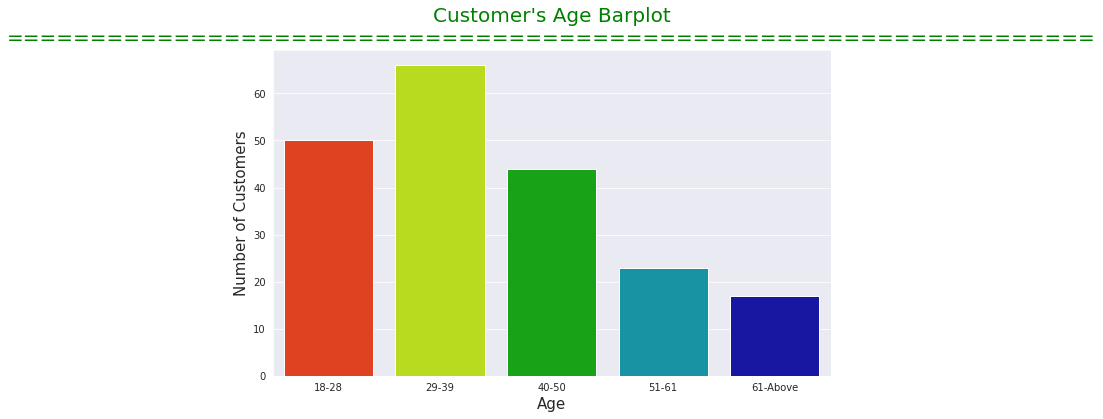

In [56]:
x = ["18-28","29-39","40-50","51-61","61-Above"]
y = [len(Age_18_28.values),len(Age_29_39.values),len(Age_40_50.values),len(Age_51_61.values),len(Age_61_Above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Customer's Age Barplot\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

### Spending Score(1-100)

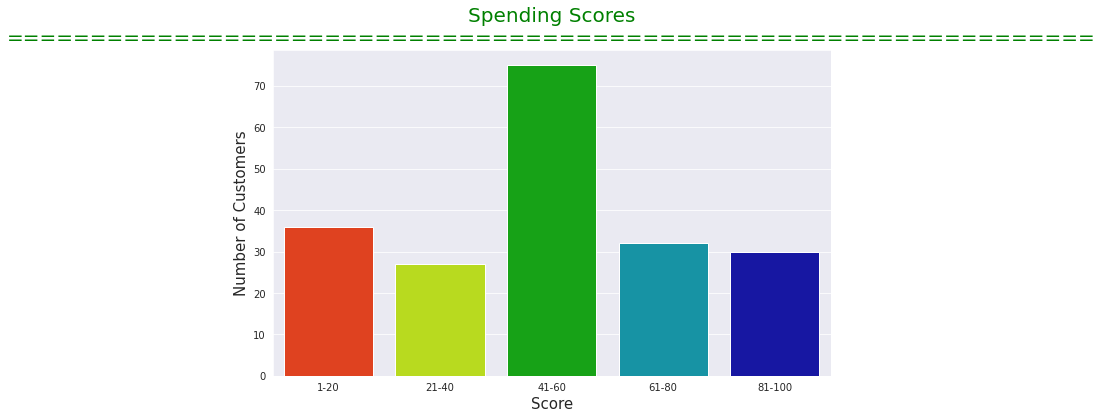

In [57]:
# Spending Score - 

ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="nipy_spectral_r")
plt.title("Spending Scores\n=================================================================", fontsize=20, color="green")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()


### Annual Income (k$)

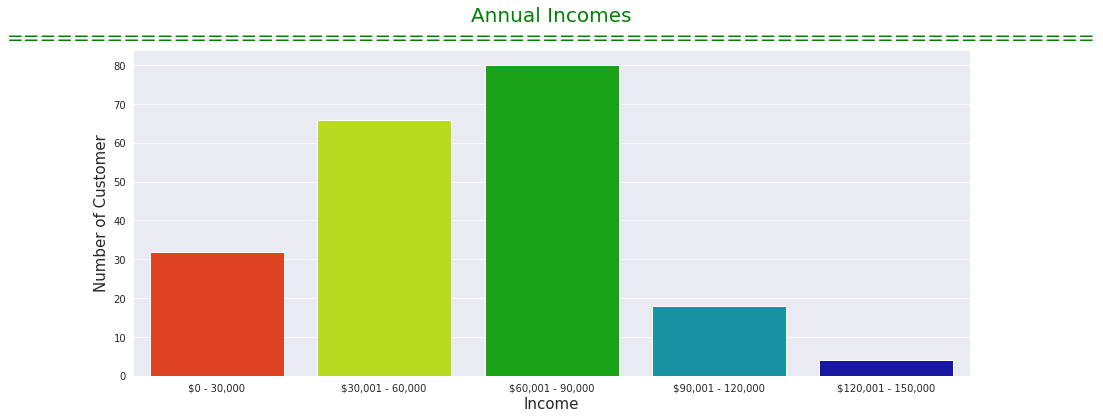

In [58]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

income_x = ["$0 - 30,000", "$30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes\n=================================================================", fontsize=20, color="green")
plt.xlabel("Income", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15)
plt.show()

<p style="background:black">
    <code style="background:black;color:white">4. Rescaling</code></p>

In [59]:
df_scaled = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)

In [60]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [61]:
var_list = df_scaled_fit[["Age", "Annual Income (k$)","Spending Score (1-100)"]]

<p style="background:black">
    <code style="background:black;color:white">5. Model Building</code></p>

In [62]:
# Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(var_list)
    
    ssd.append(kmeans.inertia_)

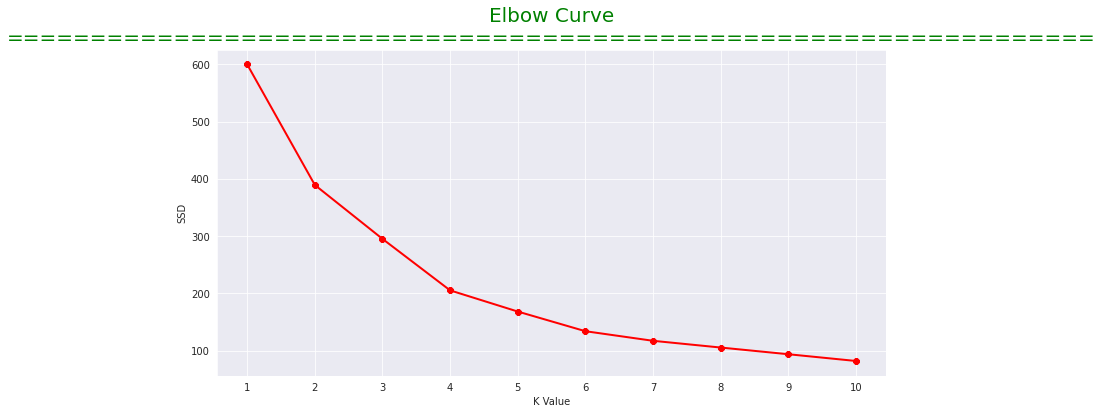

In [63]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - From the above Elbow curve we will take the value of K=5 and rebuild the cluster.</code>

In [64]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=5)

In [65]:
kmeans.labels_

array([2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2,
       4, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [66]:
df["Label"] = kmeans.labels_

In [67]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


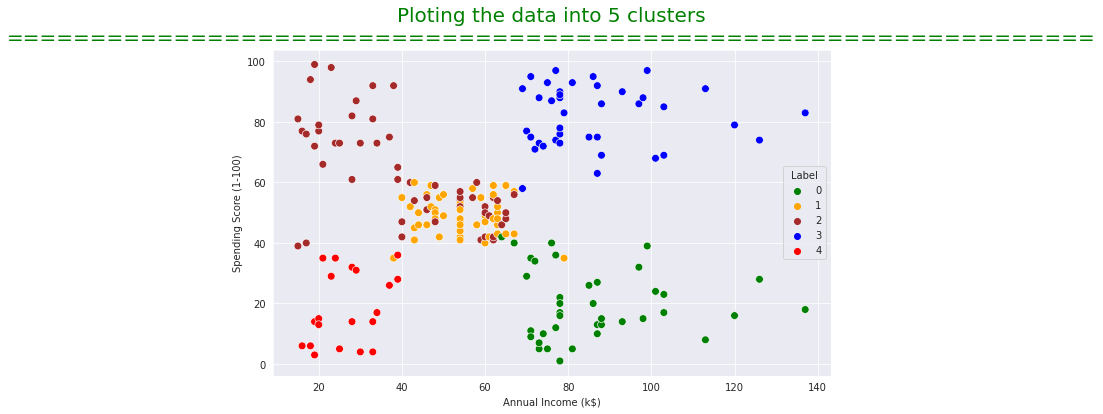

In [68]:
# ScatterPlot when K=5

plt.figure(figsize=(10,6))

plt.title("Ploting the data into 5 clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - From the above we can see that the data has been clustered into 5 different parts.</code>

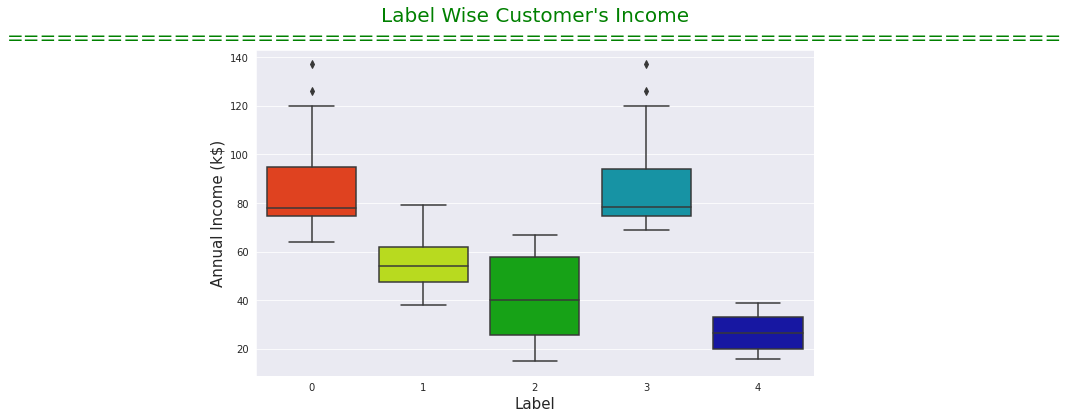

In [69]:
# plot

plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Annual Income (k$)', data=df, palette="nipy_spectral_r")
plt.title("Label Wise Customer's Income\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Annual Income (k$)",fontsize=15)
plt.show()

<code style="background:yellow;color:black"><b>Conclusion</b> - Customer segment 1 and 4 are having high Annual income.</code>

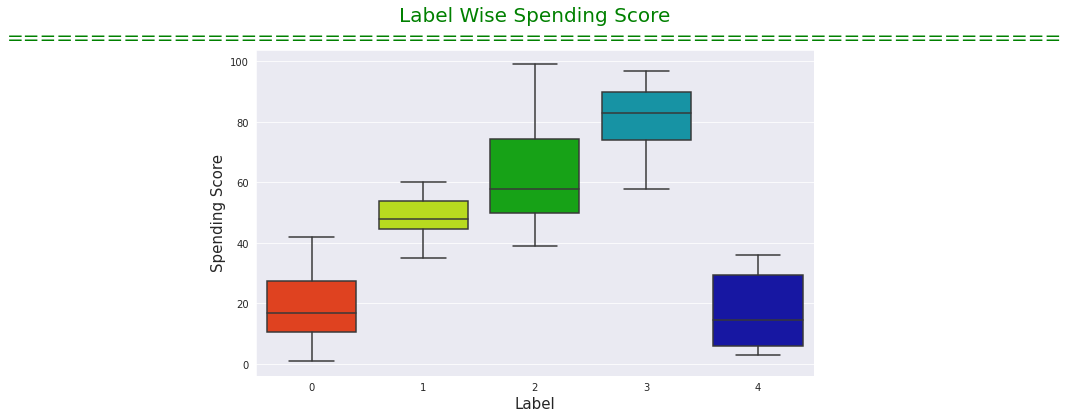

In [70]:
# plot

plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Spending Score (1-100)', data=df, palette="nipy_spectral_r")
plt.title("Label Wise Spending Score\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Spending Score",fontsize=15)
plt.show()

In [71]:
df[df['Label'] == 0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Label
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,159.743590,39.871795,86.102564,19.358974,0.0
std,24.104725,10.938054,16.725013,11.610991,0.0
min,113.000000,19.000000,64.000000,1.000000,0.0
25%,140.000000,34.000000,74.500000,10.500000,0.0
50%,159.000000,41.000000,78.000000,17.000000,0.0
75%,180.000000,47.000000,95.000000,27.500000,0.0
max,199.000000,59.000000,137.000000,42.000000,0.0


In [72]:
df[df['Label'] == 1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Label
count,47.000000,47.000000,47.000000,47.000000,47.0
mean,83.872340,55.638298,54.382979,48.851064,1.0
std,24.425234,8.913657,8.818344,6.303825,0.0
min,41.000000,40.000000,38.000000,35.000000,1.0
25%,64.500000,49.000000,47.500000,44.500000,1.0
50%,81.000000,54.000000,54.000000,48.000000,1.0
75%,102.500000,65.000000,62.000000,54.000000,1.0
max,161.000000,70.000000,79.000000,60.000000,1.0


In [73]:
df[df['Label'] == 2].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Label
count,54.000000,54.000000,54.000000,54.000000,54.0
mean,55.648148,25.185185,41.092593,62.240741,2.0
std,36.656054,5.508395,16.815613,16.596130,0.0
min,1.000000,18.000000,15.000000,39.000000,2.0
25%,24.500000,21.000000,25.750000,50.000000,2.0
50%,49.500000,24.000000,40.000000,58.000000,2.0
75%,88.750000,30.000000,57.750000,74.500000,2.0
max,121.000000,38.000000,67.000000,99.000000,2.0


In [74]:
df[df['Label'] == 3].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Label
count,40.00000,40.000000,40.000000,40.000000,40.0
mean,161.02500,32.875000,86.100000,81.525000,3.0
std,23.33863,3.857643,16.339036,9.999968,0.0
min,123.00000,27.000000,69.000000,58.000000,3.0
25%,141.50000,30.000000,74.750000,74.000000,3.0
50%,161.00000,32.000000,78.500000,83.000000,3.0
75%,180.50000,36.000000,94.000000,90.000000,3.0
max,200.00000,40.000000,137.000000,97.000000,3.0


In [75]:
df[df['Label'] == 4].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Label
count,20.000000,20.000000,20.000000,20.000000,20.0
mean,24.100000,46.250000,26.750000,18.350000,4.0
std,12.336936,11.579815,7.311671,11.935242,0.0
min,3.000000,20.000000,16.000000,3.000000,4.0
25%,14.500000,36.750000,20.000000,6.000000,4.0
50%,24.000000,47.000000,26.500000,14.500000,4.0
75%,33.500000,53.250000,33.000000,29.500000,4.0
max,45.000000,67.000000,39.000000,36.000000,4.0


In [76]:
cust1 = df[df['Label'] == 0]
print("The number of customers in group '0' =", len(cust1))
print("The Customer Id are - ", cust1['CustomerID'].values)
print("============================================================================================\n")

cust2 = df[df['Label'] == 1]
print("The number of customers in group '1' =", len(cust2))
print("The Customer Id are - ", cust2['CustomerID'].values)
print("============================================================================================\n")

cust3 = df[df['Label'] == 2]
print("The number of customers in group '2' =", len(cust3))
print("The Customer Id are - ", cust3['CustomerID'].values)
print("============================================================================================\n")

cust4 = df[df['Label'] == 3]
print("The number of customers in group '3' =", len(cust4))
print("The Customer Id are - ", cust4['CustomerID'].values)
print("============================================================================================\n")

cust5 = df[df['Label'] == 4]
print("The number of customers in group '4' =", len(cust5))
print("The Customer Id are - ", cust5['CustomerID'].values)
print("============================================================================================\n")


The number of customers in group '0' = 39
The Customer Id are -  [113 122 125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155
 157 159 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193
 195 197 199]

The number of customers in group '1' = 47
The Customer Id are -  [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  78  80  81  83  84  86  87  90  91  93  94  97  99 102 103
 105 107 108 109 110 111 117 118 119 120 161]

The number of customers in group '2' = 54
The Customer Id are -  [  1   2   4   5   6   8  10  12  14  16  18  20  22  24  26  28  30  32
  34  36  38  40  42  44  46  48  49  50  52  53  59  62  66  69  70  76
  79  82  85  88  89  92  95  96  98 100 101 104 106 112 114 115 116 121]

The number of customers in group '3' = 40
The Customer Id are -  [123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 194 196 198 200]



<p style="background:black">
    <code style="background:black;color:white">END</code></p>